In [2]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
root = "/home/user/Desktop/pfe/tablice-5"
charsetpath = f"{root}/character-dataset"
characters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "Ch", "Cj", "D", "Dj", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "Sh", "T", "U", "V", "W", "X", "Y", "Z", "Zh"]

train = False

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
trainset = train_datagen.flow_from_directory(
        f"{charsetpath}/train",
        target_size=(28,28),
        batch_size=1,
        class_mode='sparse')

testset = train_datagen.flow_from_directory(
        f"{charsetpath}/val",
        target_size=(28,28),
        class_mode='sparse',
        batch_size=3)

Found 978 images belonging to 41 classes.
Found 246 images belonging to 41 classes.


In [5]:
# model = Sequential()
# model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(4, 4)))
# model.add(Dropout(0.4))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(41, activation='softmax'))

# model.compile(optimizer=Adam(0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [6]:
model = None
if train:
    model = Sequential()
    model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
    model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(41, activation='softmax'))

    model.compile(optimizer=Adam(0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

    history = model.fit(trainset, epochs=15, validation_data=testset)
    model.save("charnet.keras")
else:
    model = tf.keras.models.load_model(f"{root}/charnet.keras")

2023-07-28 10:46:05.664378: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-07-28 10:46:05.664418: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: DELL
2023-07-28 10:46:05.664423: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: DELL
2023-07-28 10:46:05.664619: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.54.3
2023-07-28 10:46:05.664652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.54.3
2023-07-28 10:46:05.664655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.54.3


In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        23248     
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        131104    
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        131136    
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        65600     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                      

In [8]:
testsetpath = f"{charsetpath}/val"
labels = os.listdir(testsetpath)

images = []
for label in labels:
    testclasspath = f"{testsetpath}/{label}"
    for filename in os.listdir(f"{testsetpath}/{label}"):
        image = tf.keras.preprocessing.image.load_img(f"{testclasspath}/{filename}", target_size=(28, 28))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image /= 255
        images.append((image, label.replace("class_", "")))

y_true = []
y_pred = []

for i, (image, label) in enumerate(images):
    y_true.append(label)
    if i % 10 == 0:
        print(f"processing image {i}")
    preds = model.predict(image)

    y_pred.append(characters[np.argmax(preds, axis=-1)[0]])

processing image 0
1/1 [==============================] - 0s 20ms/step
processing image 10
1/1 [==============================] - 0s 28ms/step
processing image 20
1/1 [==============================] - 0s 24ms/step
processing image 30
1/1 [==============================] - 0s 22ms/step
processing image 40
1/1 [==============================] - 0s 18ms/step
processing image 50
1/1 [==============================] - 0s 21ms/step
processing image 60
1/1 [==============================] - 0s 18ms/step
processing image 70
1/1 [==============================] - 0s 20ms/step
processing image 80
1/1 [==============================] - 0s 19ms/step
processing image 90
1/1 [==============================] - 0s 18ms/step
processing image 100
1/1 [==============================] - 0s 19ms/step
processing image 110
1/1 [==============================] - 0s 25ms/step
processing image 120
1/1 [==============================] - 0s 22ms/step
processing image 130
1/1 [==============================] - 0s

In [9]:
m = confusion_matrix(y_true, y_pred, labels=characters)

<Axes: >

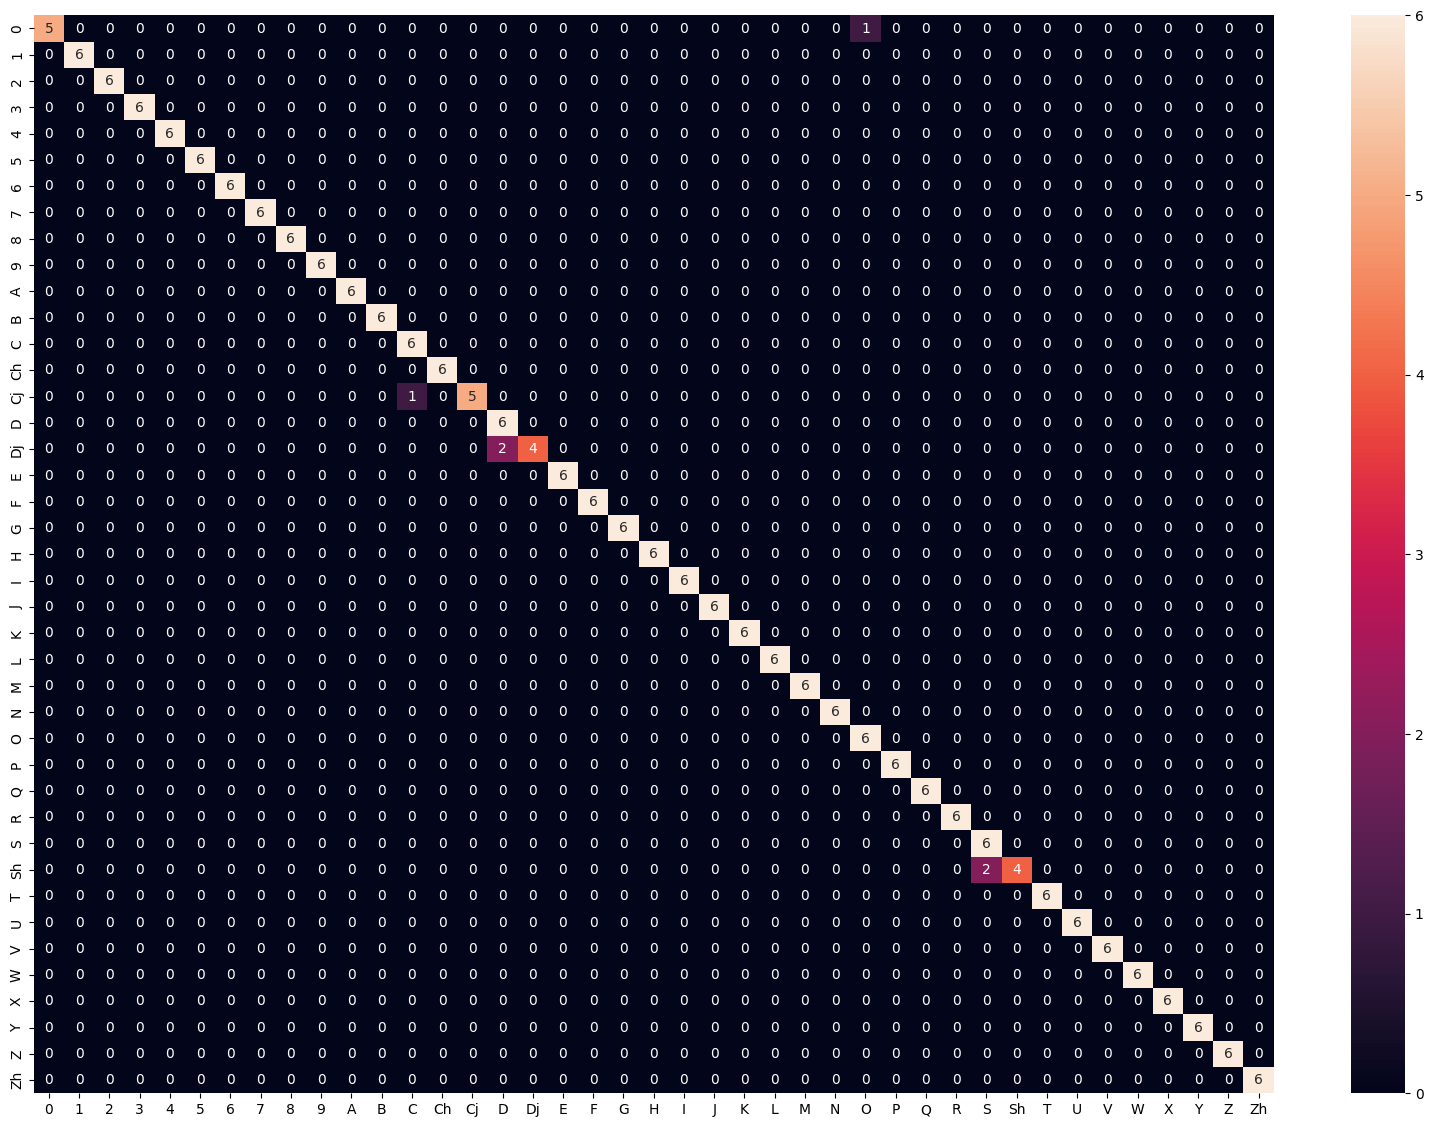

In [13]:
df_cm = pd.DataFrame(m, index=characters,
                  columns=characters)
plt.figure(figsize=(20,14))
sn.heatmap(df_cm, annot=True)

In [11]:
n = 0
nt = 0
for i in range(len(y_true)):
    n += 1
    if y_true[i] == y_pred[i]:
        nt += 1

In [14]:
print("accuracy:", nt / n)

accuracy: 0.975609756097561
